In [2]:
# simple search procedure with keywords in text of ICDAR proceedings

import os
SOURCE = '/home/jordy/code/opensource/calibration/data/ICDAR2021'

for root, dirs, files in os.walk(SOURCE):
    for file in files:
        if file.endswith(".pdf"):
             print(os.path.join(root, file))
             os.system(f'pdftotext {os.path.join(root, file)}')
             


/home/jordy/code/opensource/calibration/data/ICDAR2021/978-3-030-86334-0.pdf
/home/jordy/code/opensource/calibration/data/ICDAR2021/978-3-030-86331-9.pdf
/home/jordy/code/opensource/calibration/data/ICDAR2021/978-3-030-86337-1.pdf
/home/jordy/code/opensource/calibration/data/ICDAR2021/978-3-030-86549-8.pdf


In [50]:
import regex as re
GENERIC = ['document']
TASKS = ['classification', 'key information', 'layout analysis', 'question answering']
CALIBRATION = ['calibration', 'calibrate', 'temperature scaling', 'failure prediction', 'misclassification detection', 'out-of-distribution', 'ood', 'predictive uncertainty']
KEYWORDS = GENERIC + TASKS + CALIBRATION

counter = {k:0 for k in KEYWORDS}
texts = ""
#count how many each keyword appears in the texts
for root, dirs, files in os.walk(SOURCE):
    for file in files:
        if file.endswith(".txt"):
            with open(os.path.join(root, file), 'r') as f:
                text = f.read()
                texts += text
                
for keyword in KEYWORDS:
    if keyword in GENERIC or keyword in TASKS:
        flags = re.IGNORECASE
    else:
        flags = re.IGNORECASE | re.MULTILINE
    pattern = r"(.*\b" + re.escape(keyword) + r"\b.*)"
    pattern = re.compile(pattern, flags=flags)
    counts = re.findall(pattern, texts)
    if keyword in CALIBRATION:
        print(f'-- Keyword: {keyword} -- ') 
        for line in counts:
            print(line)
        print()
    counter[keyword] += len(counts)
    
#print(counter)
for k in GENERIC:
    print(f'{k}: {counter[k]}')
for k in TASKS:
    print(f'{k}: {counter[k]}')
for k in CALIBRATION:
    print(f'{k}: {counter[k]}')


-- Keyword: calibration -- 
9. Das, D., Lee, C.G.: Zero-shot image recognition using relational matching, adaptation and calibration. In: 2019 International Joint Conference on Neural Networks
with a dicotomic search on the basis of arbitrary deﬁned calibration parameters.
the calibration of several thresholds and setting a minimal segmentation quality is hard to tune. The ZoneMap [9] metric improved DetEval to enable the
but depends on two thresholds which prevent an easy calibration. The COCO
calibration of this parameter depends on the intensity of the edges detected by
combination of the best model for Stage 1 with the best calibration for each
detection while integrating the threshold calibration directly in its training process. Further work will be needed to enable its compatibility with the watershed.
– The network is end-to-end trainable and do not need any post-calibration for
without the need of any human annotation. Using self-calibration, fully
Keywords: Object detection ·

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

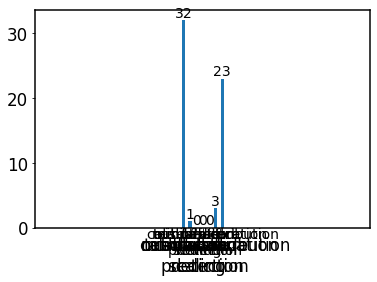

In [48]:
# plot a pie chart with the counts labeled
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0
#mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.usetex'] = False
# mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{newtxmath}'
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1
mpl.rcParams['savefig.transparent'] = True
#mpl.rcParams['savefig.format'] = 'pdf'
#mpl.rcParams['savefig.frameon'] = False
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.major.size'] = 5

#skip the generic keywords and task keywords
labels = [k.replace(' ', '\n') for k in counter.keys() if k not in GENERIC + TASKS]
sizes = [v for k,v in counter.items() if k not in GENERIC + TASKS]
#explode = [0.1 if k in CALIBRATION else 0 for k in counter.keys()]

# plt.pie(sizes, labels=labels, autopct='%1.1f%%',
#         shadow=False, startangle=90, textprops={'fontsize': 14})

# draw a histogram
fig, ax = plt.subplots()
# make the text labels of the keywords readable]

for i, v in enumerate(sizes):
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=14)

for i, v in enumerate(labels):
        ax.text(i, 0, str(v), ha='center', va='top', fontsize=14)        
        
ax.bar(labels, sizes, width=0.5, color='tab:blue')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('pie_chart.pdf')
plt.show()
